In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [9]:
def make_system(alpha, beta, gamma, delta):
    """Make a system object of prey and predator birth and death rates    
    returns: System object
    """
    init = State(X = 1, Y = 1)
    ## init /= np.sum(init)

    t0 = 0
    t_end = 200

    return System(init=init, t0=t0, t_end=t_end, alpha = alpha,
                  beta=beta, gamma=gamma, delta=delta)

In [10]:
def plot_results(x, y):
    """Plot the results of a Lotka-Volterra model
    
    x: TimeSeries
    y: TimeSeries
    """
    plot(x, '--', label='Prey')
    plot(y, '-', label='Predator')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of Population')

Here's an updated version of `run_simulation` that uses `unpack`.

In [11]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

**Exercise:** Write a version of `update_func` that uses `unpack`.

In [12]:
# Original

def update_func(state, t, system):
    """Update the Lotka-Volterra model.
    
    state: State (x, y)
    t: time
    system: System object
    
    returns: State (xy)
    """
    x, y = state

    prey_born = system.alpha*x
    prey_dead = system.beta*x*y
    predator_born = delta*x*y
    predator_dead = gamma*y
    
    x += prey_born
    x -= prey_dead
    y += predator_born
    y -= predator_dead
    

    
    return State(X=x, Y=y)

In [13]:
# Solution goes here

Test the updated code with this example.

In [14]:
system = make_system(0.05, 0.1, 0.1, 0.1)
results = run_simulation(system, update_func)
results.head()

,X,Y
0,1,1
1,0.95,1
2,0.9025,0.995
3,0.857826,0.985299
4,0.816196,0.97129


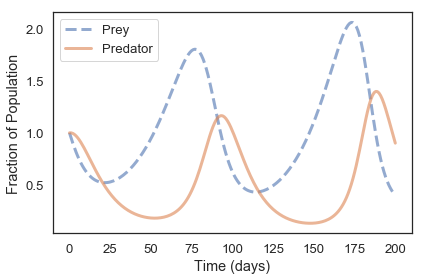

In [15]:
plot_results(results.X, results.Y)

In [19]:
# Solution goes here

In [20]:
# Solution goes here